# MCS 275 Spring 2022 Worksheet 11 Solution

* Course instructor: David Dumas
* Solutions prepared by: Jennifer Vaccaro, Johnny Joyce

## Topics

This worksheet focuses on **Matplotlib** and **Julia sets** as covered in Lectures 27--29.

The problems are labeled according to which of these topics they cover.  Make sure to get some practice with each topic (even if that means stopping work on a problem before finishing so you can move ahead).

## Resources

These things might be helpful while working on the problems.  Remember that for worksheets,  we don't strictly limit what resources you can consult, so these are only suggestions.

* [VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/):
    * Chapter 2 covers numpy
    * Chapter 4 covers matplotlib
* [Lecture 27 - Julia sets](http://dumas.io/teaching/2022/spring/mcs275/slides/lecture27.html)
* [Lecture 28 - Matplotlib](http://dumas.io/teaching/2022/spring/mcs275/slides/lecture28.html)
* [Lecture 29 - Matplotlib II](http://dumas.io/teaching/2022/spring/mcs275/slides/lecture29.html)
* Course sample code:
    * [Julia set notebook 1](https://www.dumas.io/teaching/2022/spring/mcs275/nbview/samplecode/numpy/julia.html)
    * [Julia set notebook 2 (comparing various methods)](https://www.dumas.io/teaching/2022/spring/mcs275/nbview/samplecode/numpy/julia2.html)
    * [Matplotlib intro notebook](https://www.dumas.io/teaching/2022/spring/mcs275/nbview/samplecode/matplotlib/mpl-intro.html) (but [VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/) is probably more useful!)

## Suggestions and useful matplotlib features

For the purposes of this worksheet, the online text by [VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/) is the main place to look if you want to do something in matplotlib and don't remember how, or if the exact feature that is required was not demonstrated in lecture.

However, here are a couple of features that will definitely be useful to keep in mind:

### Works in colab and jupyter notebook

It's a good idea to work on this worksheet in the Jupyter/ipython notebook environment.  For most people, these commands in the shell will install the prerequisite modules and launch a browser with the notebook environment:
```
# Install stuff
python3 -m pip install notebook numpy matplotlib

# .. now you should cd to where you want to work ..

# Launch notebook
python3 -m notebook
```

Another option is to use [Google Colab](https://colab.research.google.com/) which has matplotlib pre-installed.  You can do everything there if you like, but steps that involve writing to files are a little simpler if you use matplotlib installed on your own computer.  There is a section at the end of this document with tips for how to read and write files in Colab.

### Standard template

I suggest starting every matplotlib notebook with:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### Colors

When matplotlib expects you to specify color, you can use a string name like `"red"` or `"orange"` as we did in lecture, but you can specify a color in several other ways.  One of the easiest and most flexible is to use HTML-style hex colors, in the format `"#C0FFEE"`.  Here, the six hex digits split into pairs to give the red, green, and blue components, which in this case are `0xC0 = 192` red, `0xFF = 255` green, and `0xEE = 238` blue.  You can use an [online color picker](https://www.google.com/search?q=color+picker) to choose a color visually and see the hex codes.

### Axis labels

In class we gave a title to a plot using `plt.title("Title goes here")`, but you can also apply labels to the `x` and `y` axes with commands like

In [ ]:
plt.xlabel("Time since start of MCS 260")
plt.ylabel("Knowledge of Python")

### Bigger plots

The default figure size used by matplotlib might be a little small if you have a high-resolution computer screen.  If you find that to be the case, you can adjust the size with e.g.

In [ ]:
# Use a resolution expected to result in a figure 10 inches wide, 6 inches tall
plt.figure(figsize=(10,6))

## 1.  A few functions

Matplotlib is not the ideal tool for making graphs of functions, but it can be used for this.  To get started working on your own with matplotlib, make plots of the following functions according to the given specifications:

A single figure shows a range of 1 to 20 on the x axis and 0 to 600 on the y axis.  The graphs of four functions are shown:
* $f(x) = 100 \log(x)$ is shown in a thin, dotted black line
* $f(x) = 15x$ is shown in dark blue
* $f(x) = 10x \log(x)$ is shown in orange
* $f(x) = x^2$ is shown in red, with a thicker line

(In these expressions, $\log(x)$ means the natural logarithm, which is the usual mathematical convention and is consistent with the name in numpy.  The same function is sometimes called $\ln(x)$.)

The x axis should be labeled "x", and the y axis should be labeled "Instructions executed".

The plot should have a legend showing which function corresponds to each color and line style.

You should use 50 sample points when computing the arrays for these plots, and for the plot of $f(x) = 15x$, the individual data points should be marked with dots (in addition to the line running through them).

The plot should have an overall title "Several functions".

# Solution

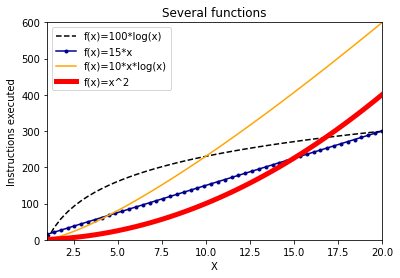

In [2]:
# Define numpy arrays for each function
x = np.linspace(1,20,50)
y0 = 100*np.log(x) # thin, dotted black line
y1 = 15*x # dark blue, solid line AND dots
y2 = 10*x*np.log(x) # orange, solid line
y3 = x**2 # red, thicker line

# Plot the functions in a single figure
plt.plot(x,y0, color="black", linestyle="dashed")
plt.plot(x,y1, color="darkblue", marker=".")
plt.plot(x,y2, color="orange")
plt.plot(x,y3, color="red", linewidth=5)

# Add a title, legend and labels
plt.legend(["f(x)=100*log(x)","f(x)=15*x","f(x)=10*x*log(x)","f(x)=x^2"])
plt.title("Several functions")
plt.xlabel("X")
plt.ylabel("Instructions executed")

# Resize and show the figure!
plt.xlim(1,20)
plt.ylim(0,600)
plt.show()

## 2. Scatter plot for space wasp defense planning

( 🧀 *Warning: This problem involves a cheesy fictional scenario.*)

The table below shows a list of some nearby star systems controlled by factions of the space wasps as of March 2289.  For each one, an estimate of their hostility level (as a score in the range 0-100), military readiness (also 0-100), and total number of spacecraft is shown.

In case diplomacy fails, you have been asked to make a scatter plot to visualize the data in the table and help with planning a defense.  The x axis of the plot should represent the hostility level, the y axis readiness, and each star system should be shown as a dot whose size is proportional to the number of spacecraft. (Scale the sizes so the dots are large but do not overlap.)

Such a plot won't show the star system names at first.  Then, learn about `plt.annotate` from the matplotlib documentation and use to add text labels to all the points where the "danger level" (defined as the product of hostility and readiness) is bigger than 3000.  Finally, adjust the way the scatter plot is drawn so that these points with high danger level are shown in a different color (e.g. red).

While I suggest getting the plot working in a notebook, when you have it finalized, make it into a script that doesn't display the figure at all, but instead saves it as both a PNG image and a PDF document.  That's easy to do if you have matplotlib installed locally.  If you don't, and intend to use matplotlib exclusively in Google Colab, you can still do it---see **Working with files in Colab** below for advice.


| System name        | Hostility | Readiness | # Spacecraft | 
|--------------------|-----------|-----------|--------------| 
| Proxima Centauri   | 84        | 63        | 4320         | 
| Barnard            | 100       | 31        | 558          | 
| Wolf 359           | 12        | 92        | 3000         | 
| Sirius             | 21        | 91        | 6520         | 
| Lalanda            | 24        | 41        | 1800         | 
| Luyten             | 88        | 36        | 290          | 
| Rigil              | 63        | 19        | 8320         | 
| Procyon            | 40        | 45        | 5000         | 
| Arcturus           | 72        | 52        | 3500         | 
| Achernar           | 18        | 50        | 1080         | 
| Capella            | 31        | 34        | 600          | 


For your convenience, the data in the table is available in a CSV file:

* [spacewasps.csv](https://dumas.io/teaching/2022/spring/mcs275/data/spacewasps.csv)

This dataset is small enough that you could probably type the arrays directly into your code just as fast as you could write code to read them from a file.  You can do that in the first version of your visualization program.  But to consider the problem completely finished, you should write a program that can read any CSV file with this structure and make a corresponding scatter plot.  If you don't have matplotlib installed locally and rely on google colab exclusively, making this work will involve an extra step of setting up integration between google drive and google colab, so you can upload a CSV file to google drive and then read it from within a colab notebook.  See the section **Working with files in Google Colab** below for details about this.

# Solution

In [ ]:
"""Code snippet for writing the Problem 2 csv data to a local csv (on Google's server) to avoid needing to mount the drive"""

datastr = """name,hostility,readiness,spacecraft
"Proxima Centauri",84,63,4320
Barnard,100,31,558
"Wolf 359",12,92,3000
Sirius,21,91,6520
Lalanda,24,41,1800
Luyten,88,36,290
Rigil,63,19,8320
Procyon,40,45,5000
Arcturus,72,52,3500
Achernar,18,50,1080
Capella,31,34,600
"""

with open("data.csv", "w") as f:
    f.write(datastr)

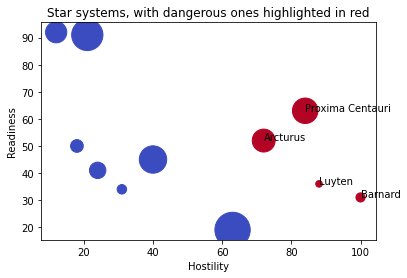

In [12]:
import csv

# create lists to contain the csv data
n_list = []
h_list = []
r_list = []
s_list = []

# Read the csv data into the lists
with open("spacewasps.csv") as f:
    rdr = csv.reader(f)
    next(rdr) # skip the header row
    for row in rdr:
        n_list.append(row[0]) # names are strings
        h_list.append(int(row[1]))
        r_list.append(int(row[2]))
        s_list.append(int(row[3]))

# convert the lists to numpy arrays
n = np.array(n_list) # name
h = np.array(h_list) # hostility
r = np.array(r_list) # readiness
s = np.array(s_list) # number of spacecraft

# compute whether each star system exceeds the danger level
d = h*r
d[d<3000] = 0
d[d>=3000] = 1



plt.scatter(h,r,s=0.15*s,c=d, cmap="coolwarm") 
# Scatter plot: x=hostility, y=readiness, size=#starships (scaled), 
#               color=danger level (1 or 0) which then applies a colormap

# Annotate star systems with danger level 1 (i.e. stars which are considered dangerous)
for i, name in enumerate(n):
    if d[i] == 1: # If dangerous
        plt.annotate(name, (h[i],r[i]))

# Add a title and labels (not in the problem, but good practice in general)
plt.xlabel("Hostility")
plt.ylabel("Readiness")
plt.title("Star systems, with dangerous ones highlighted in red")

# Uncomment this line if a notebook cell, where you want to display the figure
plt.show()

## Uncomment these lines if a script, where you want to save the figure
# plt.savefig("starship.png")
# plt.savefig("starship.pdf")

## 3. Escape rate to infinity

In lecture we created and discussed a notebook to make primitive pictures of Julia sets of quadratic polynomials $f(z) = z^2 + c$ for different values of c.  The pictures we made show a region in the complex plane, with black pixels at points $a$ where the sequence $a, f(a), f(f(a)), ...$ remains inside some disk $|z|<R$ (for all the iterations tested) and white pixels where the sequence leaves that disk.  In our pictures we used $R=2$ and took several values of $c$.

These pictures are interesting, but they throw away a lot of useful information:  Sometimes a point takes many iterations to leave the disk $|z|<R$, while other points leave the disk quickly.  That is, points that "escape to infinity" don't all do so at the same rate.

A more interesting and useful picture can be made where points are colored according to **how long** they take to leave the disk $|z|<R$, measured in the number of iterations.

For example, here's the picture our old notebook makes for `c=-0.1252+0.88j`.  It's almost entirely white, with just a scattering of black pixels.

![BW filled Julia set](images/ws11bwjulia.png)

While this means almost every point escapes to infinity, they do so at vastly different rates; the picture below colors them according to the logarithm of the number of iterations before they leave $|z|<2$.  (The number of iterations has a huge spike at the edge of the filled Julia set; taking logs prevents this from ruining the scale and making the variation elsewhere invisible.)

![escape rates as colors](images/ws11colorjulia.png)

Write a program to use matplotlib (and particularly `plt.imshow`) along with code adapted from our Julia sets notebook to make a picture like this for `c=1j` and `c=-1.7548776`.

# Solution

In [1]:
 

def julia_array(c, x_space=(-1.8,1.8,500), y_space=(-1.8,1.8,500), maxiter=150):
    """Returns a numpy array containing the (log-scaled) julia set escape times
    x_space = (xmin, xmax, xres), y_space = (ymin, ymax, yres)"""

    # Create the meshgrid of complex numbers
    x = np.linspace(*x_space) # Equivalent to np.linspace(x_space[0], x_space[1], x_space[2])
    y = np.linspace(*y_space)
    xx,yy = np.meshgrid(x,y)
    zz = xx+1j*yy

    # Create a zero-d numpy array
    esc_array = np.zeros_like(zz, "int")

    # Iterate over the points in the space 
    for i in range(x_space[2]):
        for j in range(y_space[2]):
            # Calculate the number of iterations that it takes to escape.
            esc_array[i][j] = escape_time(zz[i][j], c, bound=2, maxiter=maxiter)
    # There are ways to parallelize this part, if you'd like an extra challenge

    return np.log(1+esc_array)

def julia_plot(c, save=False):
    """Plots the julia set x**2+c escape times, with optional saving"""

    # Calculate the julia set for a constant c
    E=julia_array(c)

    # Create the plot
    plt.figure(figsize=(8,8))
    plt.imshow(E,extent=(-1.8,1.8,-1.8,1.8),cmap="inferno",origin="lower")

    # Add colorbars and labels
    plt.colorbar(fraction=0.03, pad=0.04,label="log(# iterations to leave $|z|<2$)")
    plt.xlabel("$\mathrm{Re}(z)$")
    plt.ylabel("$\mathrm{Im}(z)$")
    plt.title("Filled Julia set and escape rate for $z=z^2+{}$".format(c))

    # Optionally, save the image as a png
    if save:
        plt.savefig("julia_set_c_{}.png".format(c))

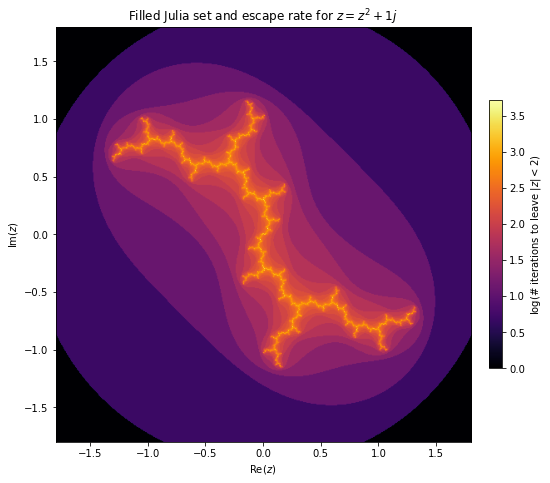

In [4]:
julia_plot(1j) # Looks like lightning

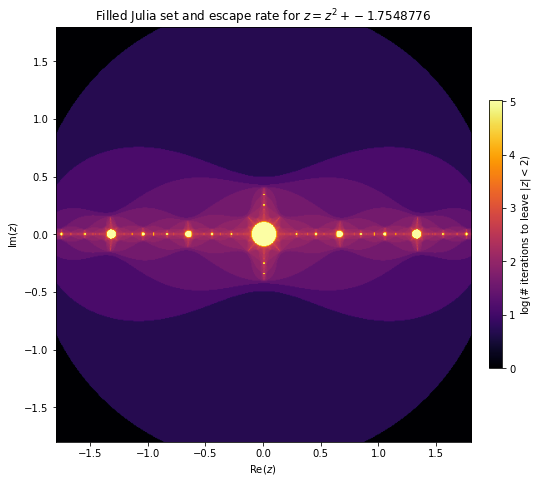

In [5]:
julia_plot(-1.7548776) # looks like an airplane coming towards you

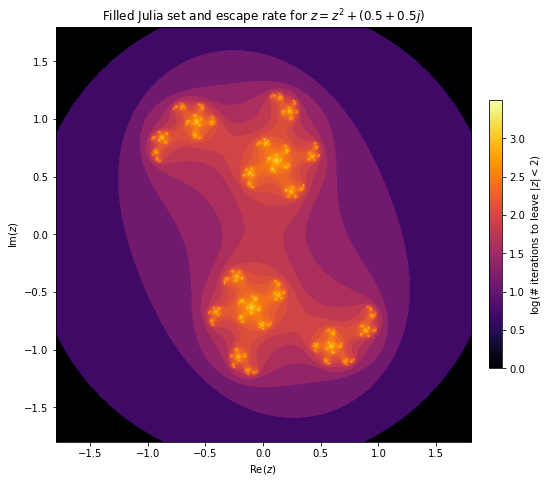

In [10]:
julia_plot(0.5+0.5j) # Interesting vortex-like pattern

## Working with files in Google Colab


I think you'll have the easiest time working on MCS 275 problems related to matplotlib if you install the notebook environment and matplotlib module locally.

However, as I mentioned in lecture, you don't need to install matplotlib locally in order to complete MCS 275 assignments.  It is pre-installed in Google Colab, allowing you to use matplotlib in a notebook interface without installing anything.

In whatever way you use matplotlib, it is important to be able to save plots to files.  Visualizations developed with matplotlib are often incorporated into other documents (e.g. research papers, reports).  Writing to a file is easy if you install matploblib locally, but requires an extra step in Colab.

If you run Python code that writes to a file in Colab, the file will be saved to a temporary location (in Colab, not on your computer) that you can't directly access from outside the notebook interface.  From within your notebook, it will look like the file exists and can be read back again.  But once you exit colab, it will be gone.

To read and write files in Colab that are persistent and accessible outside of a single notebook instance, you can connect a Colab notebook to your google drive (associated to your uic.edu account, the same one that you use Colab with).  Here is a demonstration of how to do it.  This code won't work locally or in jupyter, but will work in Colab:

In [ ]:
# Import the module to link to google drive
from google.colab import drive
# Make it so "/drive" refers to my google drive
# This will prompt you to allow google colab to access google drive, and ask
# you which google account you want to link.
drive.mount("/drive")

After running that cell in Colab, your entire google drive will appear as part of the filesystem accessible to the Python code you run in Colab, in a directory called "/drive/My Drive".  You can upload data to drive and then work with it in a Colab notebook, or you can save results to files in Colab and then download them to your computer using Google drive.

By default, the notebooks you create in Colab are stored in a folder inside your google drive called "Colab Notebooks".  In Colab, you would use that path "/drive/My Drive/Colab Notebooks" to access that folder.  So, after calling `drive.mount("/drive")` in a notebook, a typical way to create a file in the same directory as the notebook that you can later download using Google drive would be:

In [ ]:
# create a CSV file in colab that I can later download from google drive
import csv

data = [ ("n","n**2"), (1,1), (2,4), (3,9), (4,16) ]
with open("/drive/My Drive/Colab Notebooks/squares.csv","wt",newline="") as outfile:
    writer = csv.writer(outfile)
    for row in data:
        writer.writerow(row)